![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and Pedro Angelo Medeiros Fonini
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Método da secante com extremidades de sinais opostos

O método da secante é extremamente eficiente para encontrar raízes de uma função,
devido à velocidade de convergência e simplicidade.
Entretanto, assim como no caso do método de Newton, não há garantias de que ele convirja.

Entretanto, adaptar a idéia do método da bisseção para a secante
não dá uma performance tão boa, já que a convergência é apenas linear:
na _Regula Falsi_, uma das extremidades permanece fixa a partir de um certo ponto do algoritmo.
Pior ainda, dependendo de onde esta extremidade estiver, a velocidade de convergência
pode ser menor do que a do método da bisseção!

O objetivo deste projeto é estudar algoritmos usando secantes:

1. O algoritmo original da secante,
2. A implementação da _Regula Falsi_, que mantém extremidades com sinais diferentes;
3. O método "de Illinois", uma variante mais eficiente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A bisseção

Como vamos trabalhar com métodos de intervalos,
é bastante natural incluir a bisseção junto à comparação.

A implementação abaixo, recursiva, usa variáveis auxiliares (`fa`, `fb`, por exemplo)
para evitar calcular $f(a)$ mais de uma vez ao longo do algoritmo.
Além disso, estas variáveis "a mais" serão úteis para a secante e o método de Illinois.

In [2]:
def bissecao(f,a,b,xtol=1e-8):
    """ Método da bisseção para a função  f  no intervalo  [a,b].

        Retorna um número  z,  que garantimos não estar mais longe da raiz do que  xtol,
        e as listas de extremidades esquerda e direita produzidas ao longo do algoritmo.
    """
    # Validando a entrada:
    fa = f(a)
    fb = f(b)
    assert(fa*fb < 0)
    
    # Estrutura recursiva básica
    def dividir(a,b,fa,fb):
        m = (a+b)/2
        # Garantia de erro absoluto 
        if abs(m-a)/2 < xtol:
            return m,[a],[b]
        fm = f(m)
        if fm == 0:
            return m,[a],[b]

        if fa*fm < 0:
            z,l,r = dividir(a,m,fa,fm)
        else:
            z,l,r = dividir(m,b,fm,fb)
        return z, [a]+l,[b]+r
    
    z,l,r = dividir(a,b,fa,fb)
    return z, np.array(l), np.array(r)

## Parte I: O método da secante

O método da secante parte de um intervalo $[a,b]$ para o intervalo $[b,s]$,
onde $s$ é a raiz da _secante_ ao gráfico de $f$ no intervalo $[a,b]$,
ou seja, o ponto $(s,0)$ é a interseção da reta determinada por $(a, f(a))$ e $(b, f(b))$.

### 1. Cálculo do passo

Determine $z$, em função de $a$, $b$, $f(a)$ e $f(b)$.

Sendo uma reta na forma
$$r(x) = mx + n$$

$$\begin{cases} mb + n = f(b)\\
ma + n = f(a)\\
\end{cases}$$

Calculando

$$m(b-a) = f(b) - f(a)$$
$$m = \frac{f(b) - f(a)}{b-a}$$

Substituindo na primeira equação

$$n = f(b) - b\left(\frac{f(b) - f(a)}{b-a}\right)$$

Então, a raiz, quando $f(z) = 0$, será 

$$mz + n = 0$$

$$ z = - \frac{\left(f(b) - b\left(\frac{f(b) - f(a)}{b-a}\right)\right)}{\frac{f(b) - f(a)}{b-a}}$$

Multiplicando por $\frac{(b-a)}{(b-a)}$ 


$$z = - \frac{f(b).(b-a) - b.(f(b) - f(a))}{f(b) - f(a)}$$

$$z = - \frac{b.f(b) - a.f(b) - b.f(b) + b.f(a))}{f(b) - f(a)}$$

$$z = \frac{a.f(b) - b.f(a))}{f(b) - f(a)}$$


Verifique que a fórmula é **simétrica** em $a$ e $b$
(trocando também $f(a)$ por $f(b)$)

Checando a Simetria
$$r(x) = mx + n$$

$$\begin{cases} ma + n = f(a)\\
mb + n = f(b)\\
\end{cases}$$

Calculando

$$m(a-b) = f(a) - f(b)$$
$$m = \frac{f(a) - f(b)}{a-b}$$

Substituindo na primeira equação

$$n = f(a) - a\left(\frac{f(a) - f(b)}{a-b}\right)$$

Então, a raiz, quando $f(z) = 0$, será 

$$mz + n = 0$$

$$ z = - \frac{\left(f(a) - a\left(\frac{f(a) - f(b)}{a-b}\right)\right)}{\frac{f(a) - f(b)}{a-b}}$$

Multiplicando por $\frac{(a-b)}{(a-b)}$ 


$$z = - \frac{f(a).(a-b) - a.(f(a) - f(b))}{f(a) - f(b)}$$

$$x = - \frac{a.f(a) - b.f(a) - a.f(a) + a.f(b))}{f(a) - f(b)}$$

$$x = \frac{b.f(a) - a.f(b))}{f(a) - f(b)}$$


### 2. Programação

Implemente o método da secante, modificando a função de bisseção acima.
Ao contrário da bisseção, o método da secante não precisa de sinais opostos,
e portanto dispensa alguns testes -
entretanto, também não garantimos a convergência,
então teremos que introduzir, como no método de Newton, critérios de parada
em termos do tamanho do passo e do número máximo de iteração,
sem _garantia_ de convergência.

Observe que, depois de passar do intervalo $[a,b]$ para $[b,s]$,
a "iteração seguinte" deve passar para $[s,t]$,
onde $t$ é a raiz da secante definida no intervalo $[b,s]$,
e assim por diante.
Desta forma, e para simplificar o código,
o "intervalo" $[a,b]$ (e todos os outros seguintes)
deve ser entendido de forma "não-orientada".
Assim, as extremidades "esquerda" e "direita" não correspondem sempre a $a$ e $b$, respectivamente!

In [3]:
def secante(f,a,b, xtol=1e-8, maxiter=100):
    """ Método da secante para a função  f  no intervalo  [a,b].

        Retorna um número  z  e as listas de extremidades esquerda(l) e direita(r) produzidas ao longo do algoritmo,
        que pára quando o último passo é menor do que  xtol, ou depois de  maxiter  iterações.
    """
    fa = f(a)
    fb = f(b)
    m=0
    i=0
    l=[]
    r=[]
    while abs(b-a)>xtol:
        if i>=maxiter:
            raise "Você atingiu o número máximo de iterações"
        z = (a*f(b)-b*f(a))/(f(b)-f(a))
        a=b
        b=z
        i+=1
        if a < b:
            l.append(a)
            r.append(b)
        else:
            l.append(b)
            r.append(a)
    z=b
    return z, np.array(l), np.array(r)

As caixas a segiur contém testes do seu método

In [4]:
z,_,_ = secante(np.sin,2,4)
assert( abs(z-np.pi) < 1e-8 )

In [5]:
# Esse teste é mais sério para a tolerância
def f(x):
    return 35*x**2 - x - 1
z,_,_ = secante(f,0,2,xtol=1e-12)
assert ( abs(z - (np.sqrt(141)+1)/70)  < 1e-12 )

In [6]:
# Esse teste é mais sério para $f(z) = 0$
z,l,r = secante(np.cos,0,2,xtol=1e-16)
assert (abs(z-np.pi/2) < 1e-16)

### 3. Um gráfico

A vantagem de retornar ambas extremidades do intervalo é que podemos fazer o gráfico do erro em função
do número de chamadas à função pedindo apenas uma tolerância suficientemente pequena.


Considere a função $f(x) = \sin(x)$ no intervalo $[0,1]$.
Faça o gráfico do tamanho do intervalo do método da secante em função do número de passos.
Note que o tamanho do intervalo é uma estimativa do erro do método independente do valor real da raiz.
Faça no mesmo eixo o gráfico do tamanho do intervalo da bisseção.

Pense bem nas escalas que você vai escolher.

In [7]:
secante(np.sin,2,4)

(3.141592653589793,
 array([3.09152808, 3.09152808, 3.14159036, 3.14159036, 3.14159265]),
 array([4.        , 3.14787496, 3.14787496, 3.14159265, 3.14159265]))

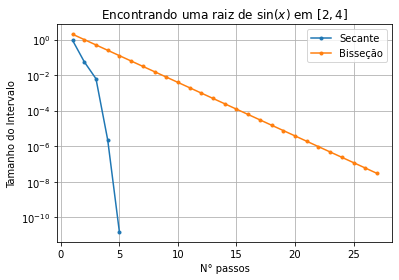

In [8]:
z,l,r = secante(np.sin,2,4)
a,b,c = bissecao(np.sin,2,4) 
x1 = np.arange(len(l))+1
x2 = np.arange(len(b))+1
y1 = r-l
y2 = c-b
plt.semilogy(x1,y1,marker=".",label="Secante")
plt.semilogy(x2,y2,marker=".",label="Bisseção")
plt.title('Encontrando uma raiz de $\sin(x)$ em $[2,4]$')
plt.xlabel("N° passos")
plt.ylabel("Tamanho do Intervalo")
plt.legend()
plt.grid();

### 4. Secante e Newton

Veja que o tamanho do intervalo tende bastante rápido a zero.
Uma explicação para isso é que a secante, quando intervalo fica pequeno, também é uma boa aproximação da derivada.
Que outras similaridades e diferenças há entre o método da secante e o método de Newton?

Algumas similaridades se dão nos critérios de convergência dos dois métodos, já que não são garantidos as convergências, porém o metodo da secante, além de divergir quando o metodo de newton diverge, ela pode divergir quando  $f(x_{k})\approx f(x_{k-1})$ acontecer.

## Parte II: A _Regula Falsi_

A _Regula Falsi_ parte de um intervalo $[a,b]$ onde a função $f$ tem sinais opostos
para o intervalo $[a,z]$ ou $[z,b]$, de modo a manter o sinal oposto,
o que garante que há uma raiz dentro do intervalo como no método da bisseção.
A diferença é que $z$ não é o ponto médio,
mas a interseção da reta determinada por $(a, f(a))$ e $(b, f(b))$,
como no caso do método da secante.

Para implementar a _Regula Falsi_, desejamos modificar o mínimo possível a função da bisseção acima.
Antes de escrever o código, vamos ver duas coisas.

### 5. Estimativa de erro da raiz

Dados um intervalo $[a,b]$ e o ponto $z$ obtido pelo método da secante,
determine o maior erro possível entre $z$ e uma raiz da função.

Explique como mudar o teste de saída da função que depende de `tol`.

O maior erro possível entre z e uma raíz é $|b-a| < tol$

Devemos mudar o criterio para que retornemos uma sáida quando o tamanho do intervalo $(z-a)$ ou $(z-b)$ seja menor que a tolerância para o intervalo que contiver a raiz.

### 6. Estimativas de $f(z)$.

- Suponha que $f(z) = 0$ e que o método _não testasse_ `f(z) == 0`. O que aconteceria na iteração seguinte?
- Diga porquê é **melhor** testar esta outra condição em vez de `f(z) == 0`. Dica: calcule `sin(pi)`.

Por razões de simetria, é mais razoável implementar o teste com `a` e `b`.

Na iteração seguinte ele iria mudar o intervalo para $(z,b)$ e o melhor a se fazer é testar se $|f(a)|< tol $ ou $|f(b)|<tol$

In [9]:
if 0*2<0:
    print ("a")
else:
    print ("b")

b


In [10]:
np.sin(np.pi) == 0

False

### 7. Implementando a _Regula Falsi_

Agora sim, adapte o código da bisseção para a _Regula Falsi_,
incluindo as modificações indicadas acima.

In [11]:
def regula_falsi(f,a,b,xtol=1e-8):
    # Validando a entrada:
    fa = f(a)
    fb = f(b)
    assert(fa*fb < 0)
    
    # Estrutura recursiva básica
    def dividir(a,b,fa,fb):
        z = (a*fb-b*fa)/(fb-fa)
        fz = f(z)
        # Garantia de f(z) != 0
        if abs(z-((z*fb-b*fz)/(fb-fz))) == 0:
            return z,[a],[b]
        # Garantia de erro absoluto 

        if fa*fz < 0:
            if abs(z-a)/2 < xtol:
                z=(a+z)/2
                return z,[a],[b]
            s,l,r = dividir(a,z,fa,fz)
        else:
            if abs(z-b)/2 < xtol:
                z=(b+z)/2
                return z,[a],[b]
            s,l,r = dividir(z,b,fz,fb)
        return s, [a]+l,[b]+r
    
    s,l,r = dividir(a,b,fa,fb)
    return s, np.array(l), np.array(r)

In [12]:
# Teste aqui se a sua função está funcionando.
z,l,r = regula_falsi(np.sin,2,4)
l,r

(array([2.        , 3.09152808, 3.09152808, 3.14159036, 3.14159036]),
 array([4.        , 4.        , 3.14787496, 3.14787496, 3.14159265]))

As quatro caixas a segiur contém testes do seu método

In [13]:
z,_,_ = regula_falsi(np.sin,2,4)
assert( abs(z-np.pi) < 1e-8 )

In [14]:
z,_,_ = regula_falsi(np.cos,0,4)
assert( abs(z-np.pi/2) < 1e-8 )

In [15]:
# Esse teste é mais sério para a tolerância
def f(x):
    return 35*x**2 - x - 1
z,_,_ = regula_falsi(f,0,2,xtol=1e-12)
assert ( abs(z - (np.sqrt(141)+1)/70)  < 1e-12 )

In [16]:
# Esse teste é mais sério para $f(z) = 0$
z,l,r = regula_falsi(np.cos,0,2,xtol=1e-16)
assert (abs(z-np.pi/2) < 1e-16)

### 8. Um gráfico

A vantagem de retornar ambas extremidades do intervalo é que podemos fazer o gráfico do erro em função
do número de chamadas à função pedindo apenas uma tolerância suficientemente pequena.


Considere a função $f(x) = \sin(x)$ no intervalo $[0,1]$.
Faça o gráfico do tamanho do intervalo da _regula falsi_ em função do número de passos.
Note que o tamanho do intervalo é uma estimativa do erro do método independente do valor real da raiz.
Faça no mesmo eixo o gráfico do tamanho do intervalo da bisseção.

Pense bem nas escalas que você vai escolher.

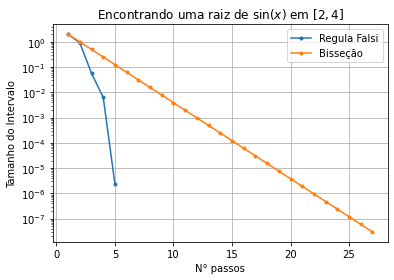

In [17]:
z,l,r = regula_falsi(np.sin,2,4)
w,e,d = bissecao(np.sin,2,4)
x1=np.arange(len(l))+1
x2=np.arange(len(e))+1
y1=r-l
y2=d-e
plt.semilogy(x1,y1,marker=".",label="Regula Falsi")
plt.semilogy(x2,y2,marker=".",label="Bisseção")
plt.xlabel("N° passos")
plt.ylabel("Tamanho do Intervalo")
plt.title('Encontrando uma raiz de $\sin(x)$ em $[2,4]$')
plt.legend()
plt.grid();

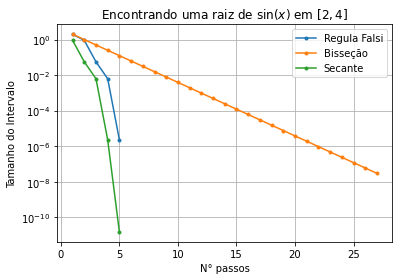

In [18]:
#teste1
z,l,r = regula_falsi(np.sin,2,4)
a,b,c = secante(np.sin,2,4)
w,e,d = bissecao(np.sin,2,4)
x1=np.arange(len(l))+1
x2=np.arange(len(e))+1
x3=np.arange(len(b))+1
y1=r-l
y2=d-e
y3=c-b
plt.semilogy(x1,y1,marker=".",label="Regula Falsi")
plt.semilogy(x2,y2,marker=".",label="Bisseção")
plt.semilogy(x3,y3,marker=".",label="Secante")
plt.xlabel("N° passos")
plt.ylabel("Tamanho do Intervalo")
plt.title('Encontrando uma raiz de $\sin(x)$ em $[2,4]$')
plt.legend()
plt.grid();

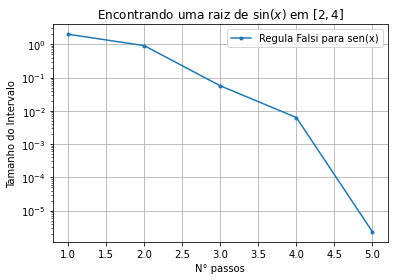

In [19]:
#teste2
z,l,r = regula_falsi(np.sin,2,4)
x1=np.arange(len(l))+1
y1=r-l
plt.semilogy(x1,y1,marker=".",label="Regula Falsi para sen(x)")
plt.xlabel("N° passos")
plt.ylabel("Tamanho do Intervalo")
plt.title('Encontrando uma raiz de $\sin(x)$ em $[2,4]$')
plt.legend()
plt.grid();

### 9. Uma outra função

Agora, faça o gráfico para a função $g(x) = \sin(x) - 0.5$ também no intervalo $[0,1]$.
O que você vê de diferente?

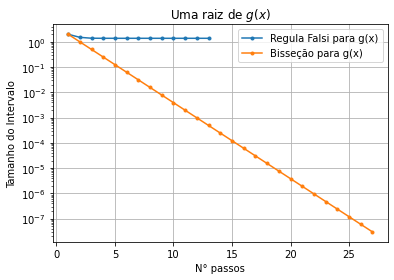

In [20]:
def g(x):
    return np.sin(x) - 0.5
z,l,r = regula_falsi(g,2,4)
a,b,c = bissecao(g,2,4)
x1=np.arange(len(l))+1
y1=r-l
x2=np.arange(len(b))+1
y2=c-b
#Eixos
plt.title('Uma raiz de $g(x)$')
plt.xlabel("N° passos")
plt.ylabel("Tamanho do Intervalo")
#plot
plt.semilogy(x1,y1,marker=".",label="Regula Falsi para g(x)")
plt.semilogy(x2,y2,marker=".",label="Bisseção para g(x)")
plt.legend()
plt.grid();

Explique o que aconteceu neste caso de diferente.

A diferença está no fato de que,neste caso, a Regula Falsi ficou presa e não conseguiu dividir o ao fazer as iterações mas mesmo assim conseguiu retornar um valor suficientemente próximo da respostas.

## Parte III: O método "de Illinois"

Para evitar "_ficar preso_" de um lado da concavidade da função,
uma das idéias mais antigas (diz-se inventada pelo grupo da Universidade de Illinois no início dos anos 50)
é **dividir por dois** o valor de $f(a)$ (ou $f(b)$) quando a extremidade correspondente não mudar durante duas iterações consecutivas.
Assim, o algoritmo passa a ser:

- Calcule `(z,fz)` a partir de `(a,fa)` e `(b,fb)` como no método da secante,
- Substitua o par `(x,fx)` que tem o mesmo sinal de `fx` por `(z,fz)` como no método da bisseção,
- Se a extremidade restante - digamos `y` - já era uma extremidade na etapa anterior, substitua `(y,fy)` por `(y,fy/2)`.

### 10. Implemente esta modificação no código da `regula falsi`.
Embora exista uma solução com um truque, o mais simples é adicionar um argumento a `dividir`
para marcar qual ponto veio da iteração anterior.

In [21]:
def illinois(f,a,b,xtol=1e-8):
    # Validando a entrada:
    fa = f(a)
    fb = f(b)
    assert(fa*fb < 0)
    # Estrutura recursiva básica
    def dividir(a,b,fa,fb,anterior=None):
        z = (a*fb-b*fa)/(fb-fa)
        # Garantia de f(z) != 0
        if abs(z-((z*f(b)-b*f(z))/(f(b)-f(z)))) == 0:
            return z,[a],[b]
        # Garantia de erro absoluto 
        fz = f(z)
        if fa*fz < 0:
            if abs(z-a)/2 < xtol:
                z=(a+z)/2
                return z,[a],[b]
            if a == anterior:
                fa=fa/2
            s,l,r = dividir(a,z,fa,fz,a)
        else:
            if abs(z-b)/2 < xtol:
                z=(b+z)/2
                return z,[a],[b]
            if b == anterior:
                fb=fb/2
            s,l,r = dividir(z,b,fz,fb,b)
        return s, [a]+l,[b]+r
    
    s,l,r = dividir(a,b,fa,fb)
    return s, np.array(l), np.array(r)

A seguir, quatro testes análogos ao da _regula falsi_, mas agora para o método de Illinois.

In [22]:
z,_,_ = illinois(np.sin,2,4)
assert( abs(z-np.pi) < 1e-8 )

In [23]:
z,_,_ = illinois(np.cos,0,4)
assert( abs(z-np.pi/2) < 1e-8 )

In [24]:
# Esse teste é mais sério para a tolerância
def f(x):
    return 35*x**2 - x - 1
z,_,_ = illinois(f,0,2,xtol=1e-12)
assert ( abs(z - (np.sqrt(141)+1)/70)  < 1e-12 )

In [25]:
# Esse teste é mais sério para $f(z) = 0$
z,l,r = illinois(np.cos,0,2,xtol=1e-16)
assert (abs(z-np.pi/2) < 1e-16)

### 11. Mais um gráfico

Aproveite a função $g$ acima para ver que o método de Illinois não tem o mesmo problema que a _regula falsi_:
faça em um mesmo eixo os gráficos do tamanho do intervalo para ambos os métodos. (Não precisa da bisseção)

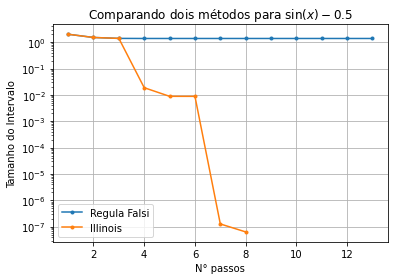

In [26]:
def g(x): return np.sin(x) - .5
z,l,r = regula_falsi(g,2,4)
w,e,d = illinois(g,2,4)
x1=np.arange(len(l))+1
x2=np.arange(len(e))+1
y1=r-l
y2=d-e
plt.semilogy(x1,y1,marker=".",label="Regula Falsi")
plt.semilogy(x2,y2,marker=".",label="Illinois")
plt.xlabel("N° passos")
plt.ylabel("Tamanho do Intervalo")
plt.title('Comparando dois métodos para $\sin(x) - 0.5$')
plt.legend()
plt.grid()

## Parte IV: Análise do método de Illinois

Esta parte final faz a análise numérica do método de Illinois,
para demonstrar a sua eficiência.

### 12. Entendendo as iterações do método de Illinois

Suponha que $f(x) = Cx^2 + Dx$ com ambos $C$ e $D$ positivos.
Suponha também que o método de Illinois está no intervalo $[a,b]$, com $a < 0 < b$ e $f(a) < 0 < f(b)$.

- Mostre que $z < 0$.
- Mostre que isso implica que somente a extremidade superior pode ficar parada.

Observação: Se quiser, escreva $a = -x$ para acertar os sinais.

Parte 1:

$z = \frac{a.f(b) - b.f(a)}{f(b) - f(a)}$

Substituindo $f(b)$ e $f(a)$ no numerador.

$z = \frac{a.(C.b^{2} + D.b) - b.(C.a^{2} + D.a)}{f(b) - f(a)}$

$z = \frac{C.a.b^{2} + D.a.b - C.a^{2}.b + D.a.b}{f(b) - f(a)}$

$z = \frac{C.a.b^{2} - C.a^{2}.b}{f(b) - f(a)}$

$z = \frac{C.a.b.(b-a)}{f(b) - f(a)}$


Veremos o sinal do numerador e do denominador, seguindo as informações dadas sobre os sinais no enunciado.

$C.a.b < 0$

$(b-a) > 0$

Então o númerador é negativo.

O denominador, 

$f(b) - f(a)>0$

Logo, $z < 0$ 

Parte 2:

Primeiro vamos calcular os zeros da função. 

$Cx^{2} + Dx = 0$

$x.(Cx + D) = 0$

$x{1} = 0$

$Cx{2} + D = 0$

$x_{2} = - \frac{D}{C}$

Como $C$ é posivito, a concavidade é para cima, e todos os números entre os zeros da função representam os pontos onde a função é negativa. Assim, sabendo que $f(a)<0$, concluimos que $-\frac{D}{C} < a < 0$. 

Outra informação que já provamos é que $z<0$, então, como $z$ pertence ao intervalo $[a,b]$, sabemos que $a < z < 0$. Logo, $z$ também está entre os zeros da função, então $f(z) < 0$. 

Relembrando os passos do algoritmo, devemos substituir $z$ por $a$ ou $b$, conforme qual desses tem a função com mesmo sinal. Como $f(a)$ e $f(z)<0$, substituiremos, para próxima iterção, o intervalo $[z,b]$. Portanto, $b$, a extremidade superior, continuará parada.

### 13. O passo modificado de Illinois

Vamos mostrar que o "passo modificado" implica em alterar a extremidade superior do intervalo.
Para simplificar um pouco as contas,
daqui em diante, suponha que $C = D = 1$, e $-1/3 < a < 0 < b < 1/3$.

Mostre os três fatos a seguir:

1. Nessas condições, $\lvert z\rvert < \lvert ab \rvert$.

2. O ponto $(b, f(b)/2)$ está abaixo da reta tangente a $f$ no ponto $(z, f(z))$. (Não substitua o valor de $z$: basta usar a estimativa acima e que $0 < b < 1/3$)

3. Enfim, conclua que a interseção da reta ligando $(z, f(z))$ e $(b, f(b)/2)$ com o eixo $X$ é positiva.

Parte 1. 
Considerando que:

$|a| < |b|$

Vamos as contas.

$z = \frac{a.f(b) - b.f(a)}{f(b) - f(a)}$

Transformando a função f,

$z = \frac{a.b^{2} + a.b - a^{2}b - ab}{b^{2} + b - a^{2} - a}$

$z = \frac{a.b(b-a)}{(b^{2} - a^{2}) + (b-a)}$

$z = \frac{a.b(b-a)}{(b-a).( b + a + 1)}$

$z = a.b.\frac{1}{b+a+1}$ 

$z = a.b.\frac{1}{b+a+1}$

Como $|a|<|b|$,

$b + a > 0$

Então,

$b + a + 1 > 1$ 

$\frac{1}{b+a+1} < 1$

$z = a.b.\frac{1}{b+a+1}$

Logo,

$|z| < |a.b|$

Parte 2

Tangente ao ponto $(z,f(z))$ é $f'(z)$


$f'(z) = 2z + 1$ 

Agora basta provar que $\frac{fb}{2} < z + 1$ 

Para isso, vamos analisar valores possíveis para $b$ e $f(b)$ segundo o enunciado

$b < 1/3$

$f(b) < 4/9$

$\frac{fb}{2} < 2/9$

Então nosso objetivo é provar que
$\frac{2}{9} < 2z + 1$ 

Para isso vamos avaliar os valores possíveis para $z$, logo, valores possíveis para $2z + 1$. Começando com o fato provado anteriormente que $z<0$. Segundo notar que o método de Illinois garante uma raiz dentro do intervalo. Dito isso, $a < z < b$. Então, com tudo que temos, podemos concluir que:

$-\frac{1}{3} < a < z < 0 $

$-\frac{1}{3} < z < 0$

Então, 

$2.\left(-\frac{1}{3}\right) + 1 < 2z + 1 < 1$

$\frac{1}{3} < 2z + 1 < 0$

Substituindo o mínimo possível, a fim de provar que $\frac{f(b)}{2} < 2z+1$

$\frac{2}{9} < \frac{1}{3}$

O que é verdade, como queríamos demonstrar.

Parte 3

Trata-se de fazer o próximo passo do Algoritmo de Illinois. Porém com $a = z$ e $f(b) = \frac{f(b)}{2}$

$z{1} = \frac{z.\frac{fb}{2} - b.f(z)}{\frac{f(b)} - f(z)}$

z = b²z/2 + bz/2  - b.z² - bz  /  fb - fz

$z{1} = \frac{\frac{b^{2}z + bz}{2} - b.z^{2} - bz}{f(b) - f(z)}$

z' = b²z -2bz² - bz/2

$z{1} = \frac{\frac{b^{2}z - 2bz^{2} - bz}{2}}{f(b)-f(z)}$

z' = bz.(b -2z - 1) / (b² - 2z²) + (b - 2z)

$z{1} = \frac{\frac{bz(b-2z-1}{2}}{b^{2} + b - 2z^{2} - 2z}$

Agora analisar o sinal, tanto do numerador quanto do denominador, para os valores extremos de $b$ e $z$

Primeiro, como já provado, $|z| < |a.b|$

$|z| < \frac{1}{9}$

Como z é negativo,

$-\frac{1}{9} < z < 0$

Voltando as as contas, veremos o númerador.

$b > 0$, $z < 0$ $\implies bz<0$

$(b - 2z - 1)$

$(b +2.|z| - 1) < \frac{1}{3} + \frac{2}{9} - 1 < -\frac{4}{9}$

Logo, como é negativo, o númerador é um produto de números negativos, assim, um número positivo.

Já o denominador é menor do que 

$\frac{1}{9} + \frac{1}{3} - \frac{2}{81} - \frac{2}{9}$

$\frac{9 + 27 - 2 - 18}{81} > 0$

Logo, o denominador também é positivo. Assim, $z_{1}$ é o quociente de dois números positivos, que é positivo.

### 14. O "período" do método de Illinois

Com isso, é possível concluir que o método de Illinois, quando suficientemente perto das raízes,
tem o seguinte comportamento:

1. Uma iteração produz um $z < 0$ de módulo menor do que $b$;
2. A iteração seguinte produz outro $z < 0$, e portanto também abaixa o valor de `fb`;
3. A terceira iteração produz um valor $z > 0$, e daí em diante esse ciclo se repete.

### 15. Primeira estimativa de velocidade

Agora, se $b$ e $a$ são pequenos, mostre que $z \sim ab$.
Este comportamento "quadrático" é o que torna o método da secante rápido.

Vamos as contas,

$z = \frac{a.b^{2} + a.b - a^{2}b - ab}{b^{2} + b - a^{2} - a}$

$z = \frac{a.b(b-a)}{(b^{2} - a^{2}) + (b-a)}$

$z = \frac{a.b(b-a)}{(b-a).( b + a + 1)}$

$z = a.b.\frac{1}{b+a+1}$ 

$z = a.b.\frac{1}{b+a+1}$

Quando a e b são pequenos, 

$a + b + 1 \approx 1$

Então,

$z \approx \frac{a.b}{1}$

$z \approx a.b$


Também é possível mostrar que, após efetuarmos um "passo modificado",
a iteração seguinte gera uma nova extremidade superior de módulo aproximadamente igual ao da extremidade inferior.
Assim, temos que em três passos saímos do intervalo $[a,b]$ para aproximadamente $[-a^2 b, a^2b]$.

Portanto, se começarmos de um intervalo $[-x,x]$, em três passos estaremos aproximadamente no intervalo $[-x^3,x^3]$.

### 16. Estimando a velocidade de convergência

- Suponha que no $n$-ésimo passo estamos no intervalo $[-x_n, x_n]$. Tome logaritmos, e deduza uma relação de recorrência aproximada entre $x_n$ e $x_{n+3}$.
- Se começamos em $[-x_0, x_0]$, qual é o tamanho (aproximado) do intervalo que atingimos em $3n$ passos?
- Conclua que o método de Illinois é super-linear.

Parte 1

$$[-x_{n}, x_{n}]$$

$${x_{n+1}} = \frac{-x_{n} f(x_{n}) - x_{n} f(-x_{n})}{f(x_{n})- f(-x_{n})}$$

Em 3 passos:

$$[-{x_{n}}^{3}, {x_{n}}^{3}]$$


$$x_{n+3} = \frac{- {x_{n}}^{3} f({x_{n}}^{3})-{x_{n}}^{3} f({x_{n}}^{3})}{f({x_{n}}^{3}) - f(-{x_{n}^{3})}}$$

$$[-x^{3n}, x^{3n}]$$

Tamanho do intervalo $\approx 2x^{3n}$